# Author : Oriel Machado

## Task 2 : Predicting the optimum number of clusters and representing it visually.

#### GRIP @ The Sparks Foundation

This is a Unsupervised Machine learning task where I tried  to predict the optimum number of clusters using k-means clustering and represent it visually from the given ‘Iris’ dataset.


## Reading, Exploring and Analysing the Data

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [2]:
# Reading the data

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Exploring the data

df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [4]:
df.shape

(150, 4)

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Finding the ideal no. of clusters.

X = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [7]:
frame= pd.DataFrame({"no. of cluster":range(1,11), "wcss":wcss})
frame.head()

,no. of cluster,wcss
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.256009
4,5,46.446182


Text(0.5, 1.0, 'The elbow plot')

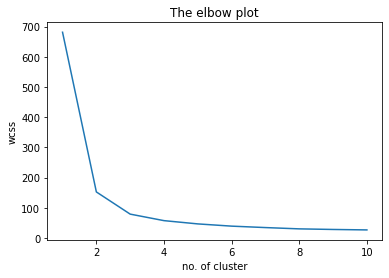

In [8]:
# Plotting the elbow curve

sns.lineplot(x='no. of cluster', y='wcss', data=frame)
plt.title("The elbow plot")

As we see from the Elbow Curve above, the optimal number of clusters for the given data is 3.

In [9]:

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)
y=kmeans.predict(df)

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualizing the Clusters



#Plotting individual clusters

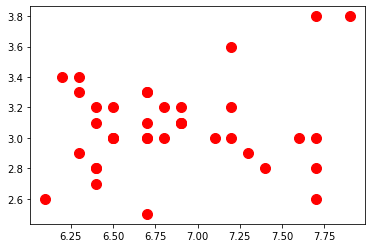

In [11]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'r')

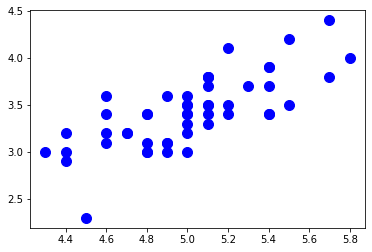

In [13]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'b',)

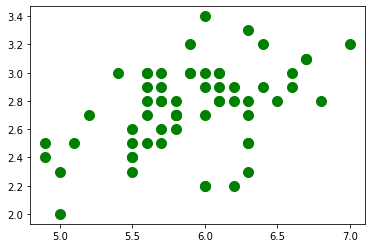

In [14]:
plt.scatter(X[y == 2, 0], X[y == 2, 1],s = 100, c = 'g',)

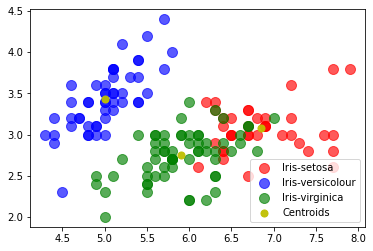

In [15]:
#Plotting all the clusters together with their cluster centers.

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            s = 100, c = 'r', label = 'Iris-setosa', alpha=0.65)
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            s = 100, c = 'b', label = 'Iris-versicolour', alpha=0.65)
plt.scatter(X[y == 2, 0], X[y == 2, 1],
            s = 100, c = 'g', label = 'Iris-virginica', alpha=0.65)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'y', label = 'Centroids', alpha=0.95)

plt.legend()

